In [1]:
import pandas as pd
import numpy as np
import scipy

from matplotlib import gridspec
import matplotlib.pyplot as plt
import seaborn as sns

from google.cloud import bigquery as bq

%matplotlib inline

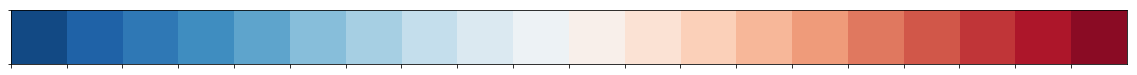

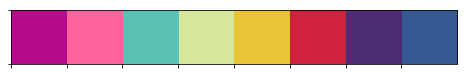

In [2]:
sns.palplot(sns.color_palette("RdBu_r", n_colors=20))
sns.palplot(sns.color_palette(["#b7098b","#ff639c", "#5bc1b5", "#d6e79a", "#eac435", "#d0213e", "#4c2c72", "#345995"]))

In [3]:
hormone_meth_bigtable = pd.read_table("./datasets/hormone_meth_bigtable.HM450.tsv", sep="\t")

print(hormone_meth_bigtable.shape)
hormone_meth_bigtable.head()

(625379, 10)


,case_barcode,sample_barcode,aliquot_barcode,probe_id,beta_value,sample_type,sample_type_name,initial_response,recurrence_status,recurrence_log
0,TCGA-AQ-A1H2,TCGA-AQ-A1H2-01A,TCGA-AQ-A1H2-01A-11D-A13K-05,cg05467160,0.86,1,Primary solid Tumor,Unknown,Unknown,"Alive tumor free, last follow-up within risky ..."
1,TCGA-AQ-A1H2,TCGA-AQ-A1H2-01A,TCGA-AQ-A1H2-01A-11D-A13K-05,cg20181887,0.94,1,Primary solid Tumor,Unknown,Unknown,"Alive tumor free, last follow-up within risky ..."
2,TCGA-AQ-A1H2,TCGA-AQ-A1H2-01A,TCGA-AQ-A1H2-01A-11D-A13K-05,cg06796779,0.92,1,Primary solid Tumor,Unknown,Unknown,"Alive tumor free, last follow-up within risky ..."
3,TCGA-AQ-A1H2,TCGA-AQ-A1H2-01A,TCGA-AQ-A1H2-01A-11D-A13K-05,cg23399222,0.94,1,Primary solid Tumor,Unknown,Unknown,"Alive tumor free, last follow-up within risky ..."
4,TCGA-AQ-A1H2,TCGA-AQ-A1H2-01A,TCGA-AQ-A1H2-01A-11D-A13K-05,cg17101450,0.91,1,Primary solid Tumor,Unknown,Unknown,"Alive tumor free, last follow-up within risky ..."


In [4]:
print("Sample types")
print(hormone_meth_bigtable.drop_duplicates(subset="sample_barcode").sample_type_name.value_counts())
print("\n")

print("Initial responses")
print(hormone_meth_bigtable.drop_duplicates(subset="case_barcode").initial_response.value_counts())
print("\n")

print("Recurrence statuses")
print(hormone_meth_bigtable.drop_duplicates(subset="case_barcode").recurrence_status.value_counts())

Sample types
Primary solid Tumor    353
Solid Tissue Normal     35
Name: sample_type_name, dtype: int64


Initial responses
Unknown               313
Complete response      34
Progressive/Stable      7
Name: initial_response, dtype: int64


Recurrence statuses
Unknown     312
Occured      30
Low risk      7
Name: recurrence_status, dtype: int64


In [5]:
meth_matrix = hormone_meth_bigtable.pivot(index='probe_id', columns='aliquot_barcode', values='beta_value')

print(meth_matrix.shape)
meth_matrix.head()

(1605, 390)


aliquot_barcode,TCGA-5L-AAT0-01A-12D-A41Q-05,TCGA-5L-AAT1-01A-12D-A41Q-05,TCGA-5T-A9QA-01A-11D-A41Q-05,TCGA-A1-A0SF-01A-11D-A145-05,TCGA-A1-A0SQ-01A-21D-A145-05,TCGA-A2-A04R-01A-41D-A10A-05,TCGA-A2-A0CK-01A-11D-A22B-05,TCGA-A2-A0CO-01A-13D-A22B-05,TCGA-A2-A0CR-01A-11D-A22B-05,TCGA-A2-A0CT-01A-31D-A10P-05,...,TCGA-S3-A6ZH-01A-22D-A32T-05,TCGA-S3-AA0Z-01A-11D-A41Q-05,TCGA-S3-AA11-01A-31D-A41Q-05,TCGA-S3-AA12-01A-11D-A41Q-05,TCGA-S3-AA17-01A-11D-A41Q-05,TCGA-V7-A7HQ-01A-11D-A33F-05,TCGA-W8-A86G-01A-21D-A36K-05,TCGA-WT-AB41-01A-11D-A41Q-05,TCGA-WT-AB44-01A-11D-A41Q-05,TCGA-XX-A899-01A-11D-A36K-05
probe_id,,,,,,,,,,,,,,,,,,,,,
cg00000321,0.59,0.40,0.78,0.26,0.12,0.07,0.45,0.31,0.32,0.76,...,0.28,0.65,0.65,0.10,0.57,0.50,0.47,0.65,0.66,0.54
cg00008036,0.25,0.42,0.60,0.14,0.10,0.62,0.35,0.28,0.26,0.35,...,0.21,0.09,0.52,0.19,0.48,0.11,0.22,0.25,0.47,0.16
cg00024494,0.83,0.59,0.93,0.70,0.90,0.94,0.76,0.44,0.54,0.94,...,0.90,0.82,0.91,0.94,0.58,0.90,0.89,0.72,0.90,0.66
cg00035316,0.56,0.47,0.87,0.54,0.78,0.65,0.71,0.69,0.40,0.82,...,0.59,0.76,0.78,0.44,0.45,0.27,0.61,0.62,0.56,0.53
cg00040588,0.33,0.33,0.84,0.30,0.57,0.74,0.30,0.57,0.36,0.53,...,0.67,0.73,0.50,0.65,0.34,0.25,0.59,0.51,0.28,0.34


In [6]:
labels_aliquots = {}

labels_aliquots["Normal"] = list(hormone_meth_bigtable.loc[hormone_meth_bigtable['sample_type'] == 11, 
                                                           'aliquot_barcode'].unique())

labels_aliquots["Complete response"] = list(hormone_meth_bigtable.loc[
                                            (hormone_meth_bigtable['sample_type'] == 1) &
                                            (hormone_meth_bigtable['initial_response'] == 'Complete response'), 
                                            'aliquot_barcode'].unique())

labels_aliquots["Progressive/Stable"] = list(hormone_meth_bigtable.loc[
                                            (hormone_meth_bigtable['sample_type'] == 1) & 
                                            (hormone_meth_bigtable['initial_response'] == 'Progressive/Stable'), 
                                            'aliquot_barcode'].unique())

labels_aliquots["Recurrence occured"] = list(hormone_meth_bigtable.loc[
                                            (hormone_meth_bigtable['sample_type'] == 1) & 
                                            (hormone_meth_bigtable['recurrence_status'] == 'Occured'), 
                                            'aliquot_barcode'].unique())

labels_aliquots["Low-risk recurrence"] = list(hormone_meth_bigtable.loc[
                                            (hormone_meth_bigtable['sample_type'] == 1) & 
                                            (hormone_meth_bigtable['recurrence_status'] == 'Low risk'), 
                                            'aliquot_barcode'].unique())

for k, v in labels_aliquots.items():
    print("{}: {}".format(k, len(v)))

Normal: 35
Complete response: 34
Progressive/Stable: 7
Recurrence occured: 31
Low-risk recurrence: 7


# Initial response

In [7]:
select = [item for key in ['Normal', 'Complete response', 'Progressive/Stable'] for item in labels_aliquots[key]]
meth_matrix = meth_matrix.loc[:,select]
meth_matrix.sort_values(by=select, inplace=True)

df = pd.concat([meth_matrix.loc[:, labels_aliquots['Normal']].sort_values(by=list(meth_matrix.index), axis=1), 
                meth_matrix.loc[:, labels_aliquots['Complete response']].sort_values(by=list(meth_matrix.index), axis=1), 
                meth_matrix.loc[:, labels_aliquots['Progressive/Stable']].sort_values(by=list(meth_matrix.index), axis=1)],
               axis=1)
meth_matrix = df

meth_matrix.shape

(1605, 76)

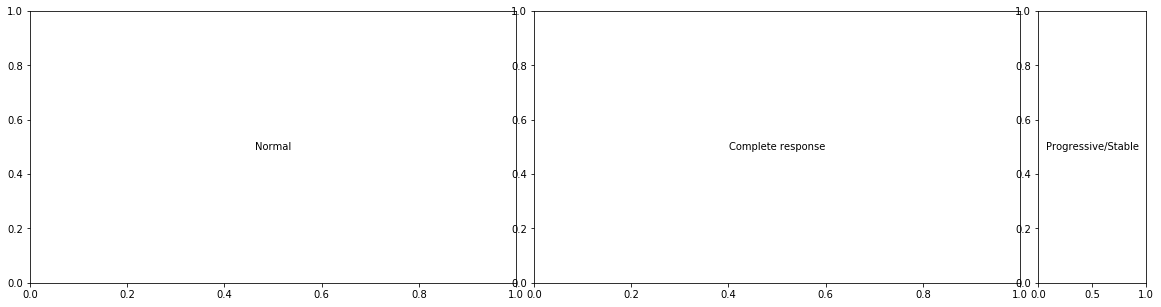

In [8]:
grid_kws = {"width_ratios": (0.45, 0.45, 0.1), "wspace": 0.05}
fig, axes = plt.subplots(1, 3, figsize=(20,5), gridspec_kw=grid_kws)

for label, ax in zip(['Normal', 'Complete response', 'Progressive/Stable'], axes):
    ax.text(0.5, 0.5, label, va="center", ha="center")

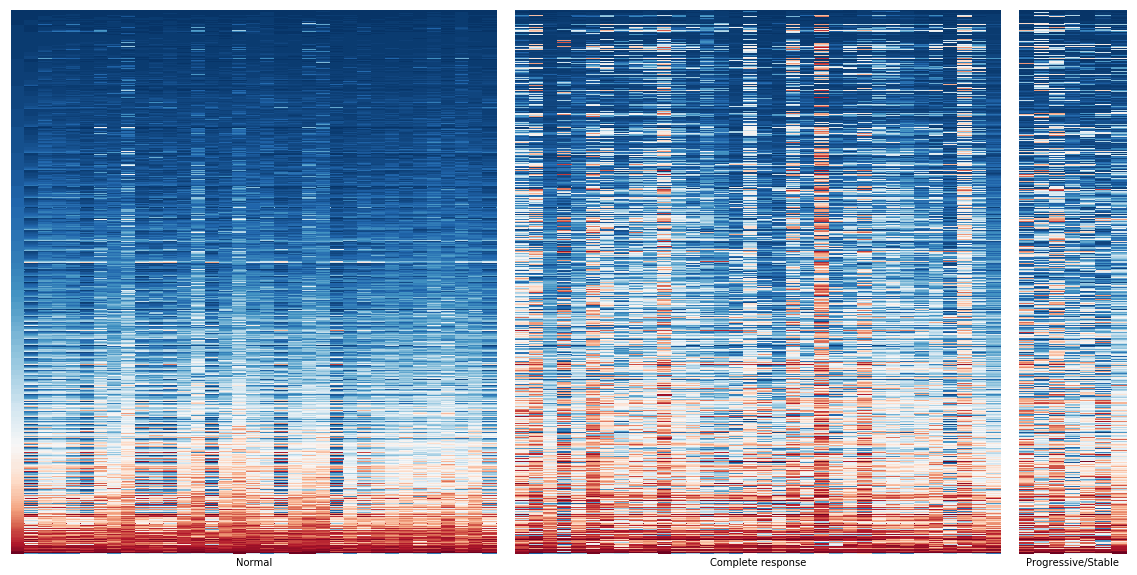

In [9]:
grid_kws = {"width_ratios": (0.45, 0.45, 0.1), "wspace": 0.05}
fig, axes = plt.subplots(1, 3, figsize=(20,10), gridspec_kw=grid_kws)

for label, ax in zip(['Normal', 'Complete response', 'Progressive/Stable'], axes):
    sns.heatmap(data=meth_matrix.loc[:, labels_aliquots[label]], 
                cmap="RdBu_r", vmin=0, vmax=1, 
                ax=ax, cbar=False, 
                xticklabels=False, yticklabels=False)
    ax.set_ylabel('')    
    ax.set_xlabel(label)

In [10]:
fig.savefig("./plots/methdata.hormone.initial_response.png", bbox_inches = 'tight', transparent=True)

# Recurrence status

In [7]:
select = [item for key in ['Normal', 'Recurrence occured', 'Low-risk recurrence'] for item in labels_aliquots[key]]
meth_matrix = meth_matrix.loc[:,select]
meth_matrix.sort_values(by=select, inplace=True)

df = pd.concat([meth_matrix.loc[:, labels_aliquots['Normal']].sort_values(by=list(meth_matrix.index), axis=1), 
                meth_matrix.loc[:, labels_aliquots['Recurrence occured']].sort_values(by=list(meth_matrix.index), axis=1), 
                meth_matrix.loc[:, labels_aliquots['Low-risk recurrence']].sort_values(by=list(meth_matrix.index), axis=1)],
               axis=1)
meth_matrix = df

meth_matrix.shape

(1605, 73)

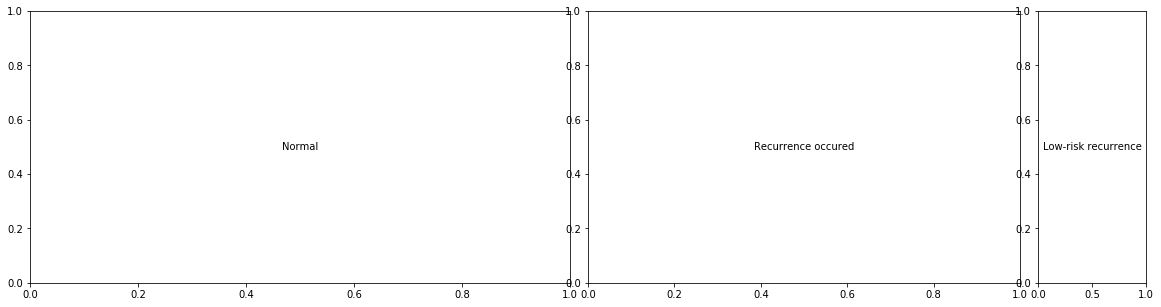

In [8]:
grid_kws = {"width_ratios": (0.5, 0.4, 0.1), "wspace": 0.05}
fig, axes = plt.subplots(1, 3, figsize=(20,5), gridspec_kw=grid_kws)

for label, ax in zip(['Normal', 'Recurrence occured', 'Low-risk recurrence'], axes):
    ax.text(0.5, 0.5, label, va="center", ha="center")

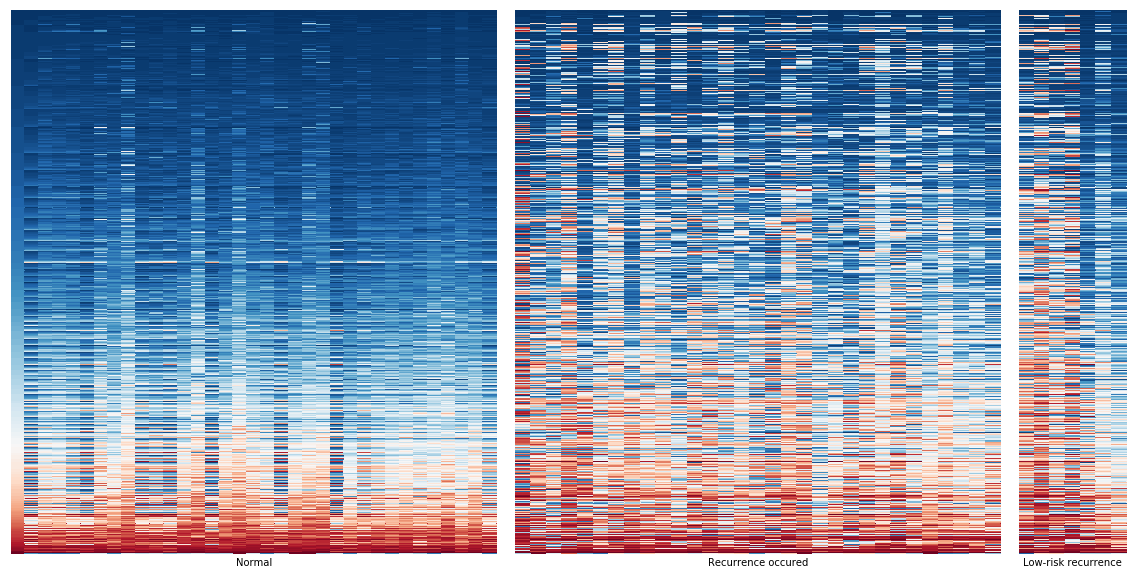

In [9]:
grid_kws = {"width_ratios": (0.45, 0.45, 0.1), "wspace": 0.05}
fig, axes = plt.subplots(1, 3, figsize=(20,10), gridspec_kw=grid_kws)

for label, ax in zip(['Normal', 'Recurrence occured', 'Low-risk recurrence'], axes):
    sns.heatmap(data=meth_matrix.loc[:, labels_aliquots[label]], 
                cmap="RdBu_r", vmin=0, vmax=1, 
                ax=ax, cbar=False, 
                xticklabels=False, yticklabels=False)
    ax.set_ylabel('')    
    ax.set_xlabel(label)

In [10]:
fig.savefig("./plots/methdata.hormone.recurrence_status.png", bbox_inches = 'tight', transparent=True)